In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

##### Loading data with age 'greater than 25' from an Excel file into a pandas DataFrame

In [2]:
df = pd.read_excel("premiums_rest.xlsx")

In [3]:
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [4]:
# add artificial genetical_risk column to be consistent with young model
df['Genetical_Risk'] = 0

In [5]:
df.shape

(29904, 14)

In [6]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [7]:
df.columns


Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [8]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
115,26,Female,Southwest,Married,3,Underweight,NaN,Salaried,> 40L,69,Diabetes,Gold,22605,0
4262,33,Male,Southeast,Married,2,Normal,Regular,Self-Employed,NaN,7,High blood pressure,Silver,18335,0
9155,27,Female,Northeast,Unmarried,2,Underweight,No Smoking,Freelancer,NaN,5,No Disease,Silver,14469,0
9198,52,Male,Northeast,Married,3,Underweight,No Smoking,Freelancer,NaN,8,Thyroid,Silver,19535,0
9313,47,Male,Southwest,Married,4,Normal,NaN,Freelancer,25L - 40L,32,Diabetes,Gold,26100,0
9728,45,Male,Northwest,Married,4,Overweight,NaN,Salaried,10L - 25L,16,High blood pressure & Heart disease,Silver,21881,0
10096,34,Male,Southwest,Married,5,Normal,NaN,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Gold,25865,0
10391,40,Female,Northeast,Married,4,Obesity,Regular,Self-Employed,NaN,8,High blood pressure,Silver,22392,0
10736,61,Female,Southwest,Married,2,Normal,NaN,Self-Employed,25L - 40L,27,Thyroid,Gold,32501,0
12122,50,Female,Northeast,Married,3,Underweight,NaN,Salaried,25L - 40L,25,High blood pressure,Gold,27317,0


In [13]:
df.dropna(inplace=True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


#### Data Cleaning

In [16]:
df[df['number_of_dependants']<0].shape

(50, 14)

In [17]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-1, -3])

In [18]:
# Replace the negative values of number_of_dependants with positive values
df['number_of_dependants'] = df['number_of_dependants'].abs()

In [19]:
df['number_of_dependants'].describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

#### Treatment of Outliers

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 29886 entries, 0 to 29903
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    29886 non-null  int64 
 1   gender                 29886 non-null  object
 2   region                 29886 non-null  object
 3   marital_status         29886 non-null  object
 4   number_of_dependants   29886 non-null  int64 
 5   bmi_category           29886 non-null  object
 6   smoking_status         29886 non-null  object
 7   employment_status      29886 non-null  object
 8   income_level           29886 non-null  object
 9   income_lakhs           29886 non-null  int64 
 10  medical_history        29886 non-null  object
 11  insurance_plan         29886 non-null  object
 12  annual_premium_amount  29886 non-null  int64 
 13  genetical_risk         29886 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 3.4+ MB


In [21]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns
num_cols

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

In [22]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.385933,23.364184,20892.303821,0.0
std,13.412657,1.421137,24.740339,6936.813440,0.0
min,26.000000,0.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


#### Age Column

In [23]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [28]:
df = df[df.age<=100]
df.age.describe()

count    29828.000000
mean        43.095380
std         11.041991
min         26.000000
25%         34.000000
50%         42.000000
75%         52.000000
max         72.000000
Name: age, dtype: float64

#### Income Column

In [29]:
quantile_thresold = df.income_lakhs.quantile(0.999)
quantile_thresold

np.float64(100.0)

In [30]:
df[df.income_lakhs>quantile_thresold].shape

(6, 14)

In [31]:
df1 = df[df.income_lakhs<=quantile_thresold].copy()
df.shape,df1.shape

((29828, 14), (29822, 14))

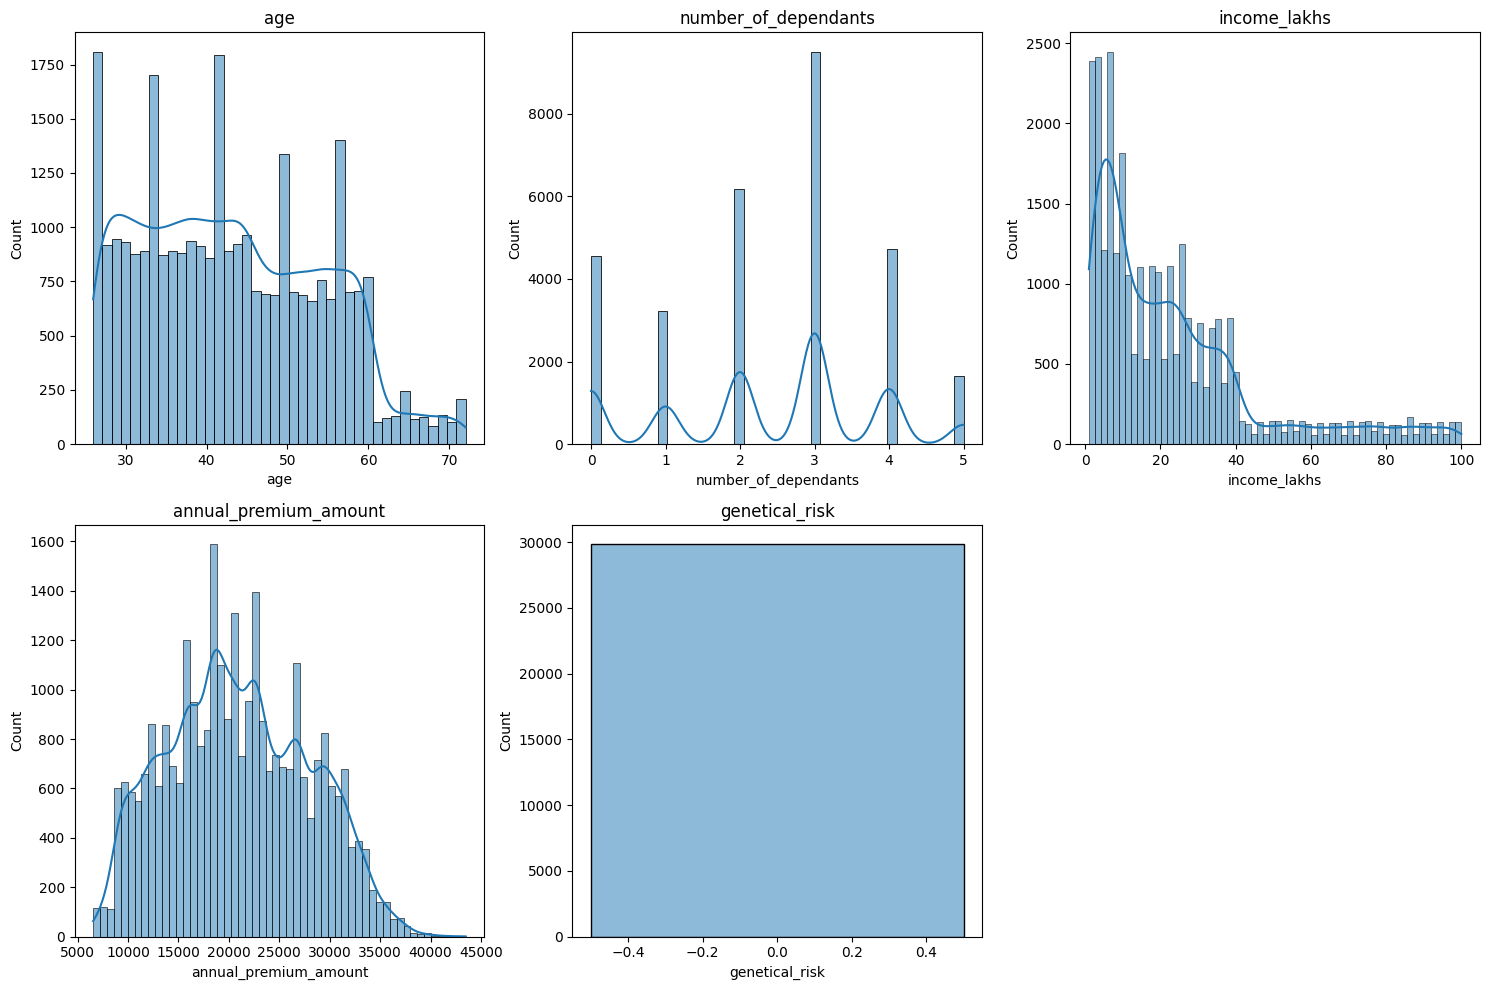

In [33]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust the size to ensure plots are not squeezed

for i, column in enumerate(num_cols):
    # Locating the correct subplot using integer division and modulus
    ax = axs[i // 3, i % 3]  # Row index is i//3, column index is i%3
    sns.histplot(df1[column], kde=True, ax=ax)
    ax.set_title(column)

# If the last subplot axis is unused, you can turn it off
if len(num_cols) % 3 != 0:
    for j in range(len(num_cols), 6):  # This will disable any unused subplots
        axs.flat[j].set_visible(False)

plt.tight_layout()
plt.savefig("github repository/rest/distribution_numeric_features_rest.png")
plt.show()

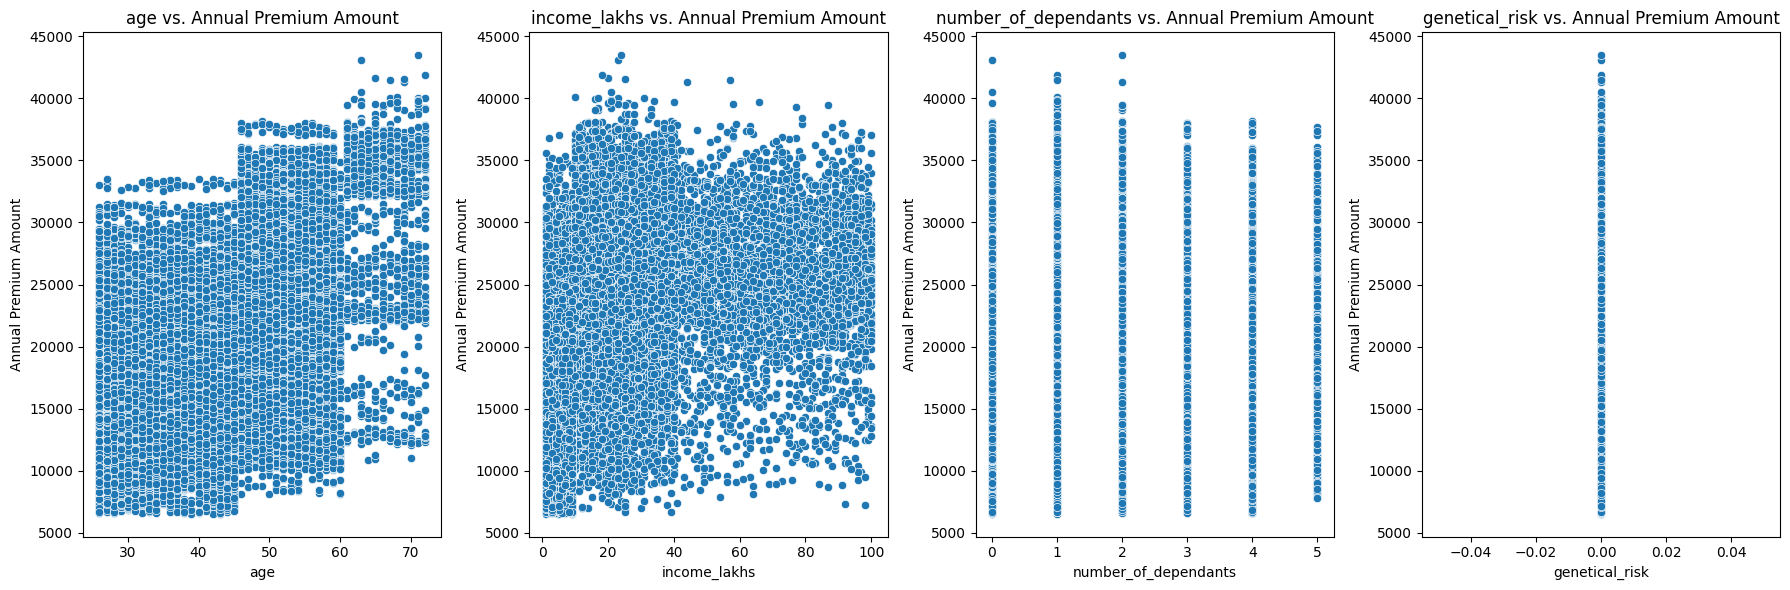

In [34]:
# Scatter Plot
numeric_features = ['age', 'income_lakhs', 'number_of_dependants', 'genetical_risk']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df1[column], y=df1['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout() 
plt.savefig("github repository/rest/scatter_plot_numeric_features_rest.png")
plt.show()

#### Categorical Columns

In [35]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']
for col in categorical_cols:
    print(col, ":", df1[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [36]:
df1['smoking_status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
}, inplace=True)

df1['smoking_status'].unique()

C:\Users\Ashok\AppData\Local\Temp\ipykernel_18308\2056166140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['smoking_status'].replace({


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

#### Feature Engineering

In [37]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


#### Calculation Of Risk Score based on medical_history

In [38]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df1[['disease1', 'disease2']] = df1['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df1['disease1'] = df1['disease1'].fillna('none')
df1['disease2'] = df1['disease2'].fillna('none')
Diseases = ['disease1', 'disease2']
df1['total_risk_score'] = 0
for disease in Diseases:
    df1['total_risk_score'] += df1[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df1['total_risk_score'].max()
min_score = df1['total_risk_score'].min()
df1['normalized_risk_score'] = (df1['total_risk_score'] - min_score) / (max_score - min_score)
df1.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571


#### Encoding Text Columns

In [39]:
df1['insurance_plan'] = df1['insurance_plan'].map({'Gold': 3,'Silver': 2,'Bronze': 1})

In [40]:
df1.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [41]:
df1['income_level'] = df1['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

In [42]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df2 = pd.get_dummies(df1, columns=nominal_cols, drop_first=True, dtype=int)
df2.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,0,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29822 entries, 0 to 29903
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              29822 non-null  int64  
 1   number_of_dependants             29822 non-null  int64  
 2   income_level                     29822 non-null  int64  
 3   income_lakhs                     29822 non-null  int64  
 4   medical_history                  29822 non-null  object 
 5   insurance_plan                   29822 non-null  int64  
 6   annual_premium_amount            29822 non-null  int64  
 7   genetical_risk                   29822 non-null  int64  
 8   disease1                         29822 non-null  object 
 9   disease2                         29822 non-null  object 
 10  total_risk_score                 29822 non-null  int64  
 11  normalized_risk_score            29822 non-null  float64
 12  gender_Male            

#### Feature Selection

In [44]:
df3 = df2.drop(['medical_history','disease1', 'disease2', 'total_risk_score'], axis=1)
df3.head(3)   

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1


### VIF calculation for Multicollinearity

In [48]:
df3.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'genetical_risk',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

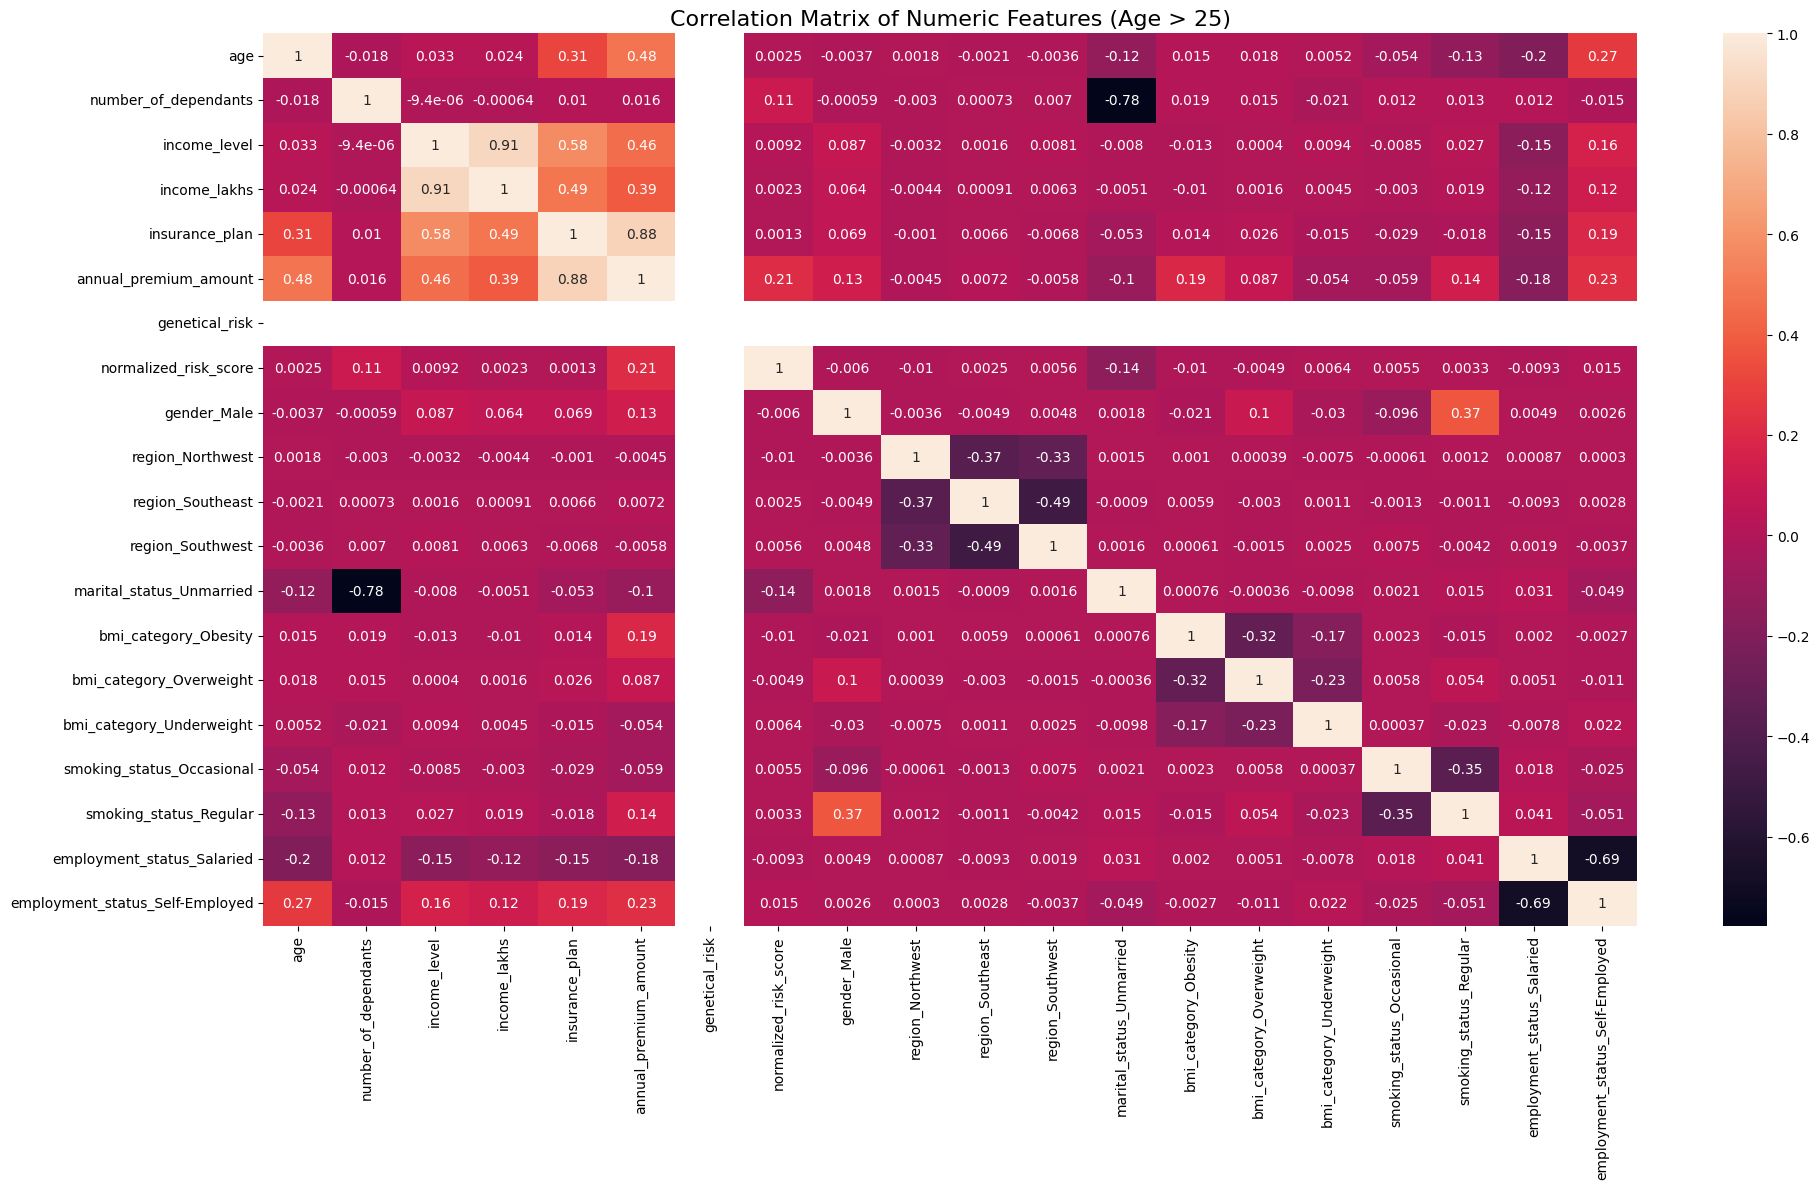

In [50]:
cm = df3.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.title("Correlation Matrix of Numeric Features (Age > 25)", fontsize=16)

plt.tight_layout()
plt.savefig("github repository/rest/Correlation_matrix_numeric_features_rest.png")
plt.show()

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [52]:
x = df3.drop('annual_premium_amount', axis='columns')
y = df3['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age','number_of_dependants','income_level', 'income_lakhs', 'insurance_plan', 'genetical_risk']
scaler = MinMaxScaler()

x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])
x.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.0,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.0,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
calculate_vif(x)

C:\Users\Ashok\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,genetical_risk,NaN
6,normalized_risk_score,3.810619
7,gender_Male,2.599098
8,region_Northwest,2.123965
9,region_Southeast,2.980842


In [55]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [56]:
# Drop income_level
calculate_vif(x.drop('income_level',axis='columns'))

,Column,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,genetical_risk,NaN
5,normalized_risk_score,3.808345
6,gender_Male,2.591439
7,region_Northwest,2.123277
8,region_Southeast,2.979899
9,region_Southwest,2.708641


In [57]:
# Finally dropping income_level column to reduce multicollinearity

x_reduced = x.drop('income_level',axis='columns')

#### Model training

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x_reduced, y, test_size=0.30, random_state=10)

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (20875, 18)
x test:  (8947, 18)
y train:  (20875,)
y test:  (8947,)


#### Linear Regression Model

In [59]:
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)
test_score = model_linear.score(x_test,y_test)
train_score = model_linear.score(x_train,y_train)
train_score,test_score

(0.9534163989489616, 0.9538448451629948)

In [60]:
np.set_printoptions(suppress=True, precision=6)
model_linear.coef_

array([ 7016.239328, -1311.764702,  -708.193369, 14835.988208,
          -0.      ,  6053.624123,    37.558269,   -55.250872,
         -19.622543,   -22.289676,  -700.3202  ,  3926.812706,
        1979.456047,   612.866236,   837.395101,  2800.661843,
         -45.491367,   243.078421])

##### Feature Importance Analysis

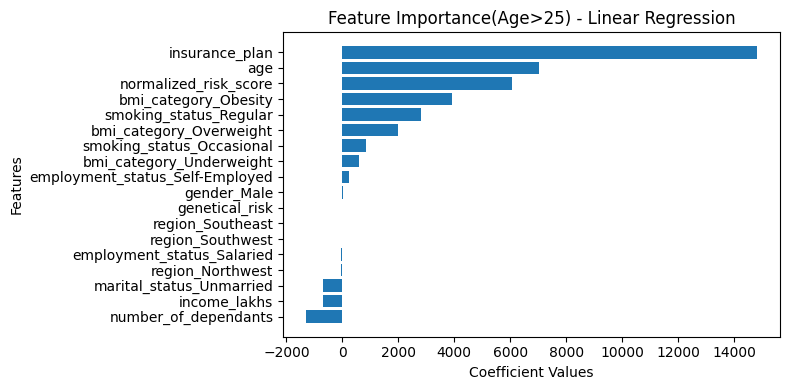

In [61]:
feature_imp = model_linear.coef_

coef_df = pd.DataFrame(feature_imp,index=x_train.columns,columns = ['Coefficients']).sort_values(ascending = True,by='Coefficients')

plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['Coefficients'])
plt.title("Feature Importance(Age>25) - Linear Regression")
plt.xlabel("Coefficient Values")
plt.ylabel("Features")

plt.tight_layout()
plt.savefig("github repository/rest/feature_importance_linear_regression_barchart_rest.png")

plt.show()

### Ridge Regression

In [62]:
from sklearn.linear_model import Ridge
model_rg = Ridge(alpha=1)
model_rg.fit(x_train, y_train)
test_score = model_rg.score(x_test, y_test)
train_score = model_rg.score(x_train, y_train)
train_score, test_score

(0.9534162332209687, 0.9538456995663842)

#### XGBOOST Regression Model

In [63]:
import xgboost as xgb
model_xgb= xgb.XGBRegressor(n_estimators = 20,max_depth=3)
model_xgb.fit(x_train,y_train)
model_xgb.score(x_test,y_test)

0.9948463439941406

In [64]:
model_xgb = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)
random_search.best_score_

np.float64(0.9970577955245972)

In [65]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [66]:
best_model = random_search.best_estimator_

In [67]:
y_pred = best_model.predict(x_test)

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
19713,26895,26691.470703,-203.529297,-0.756755
14750,22734,22650.751953,-83.248047,-0.366183
19932,21198,21581.894531,383.894531,1.810994
29643,9100,9425.934570,325.934570,3.581699
17076,26434,26691.470703,257.470703,0.974013


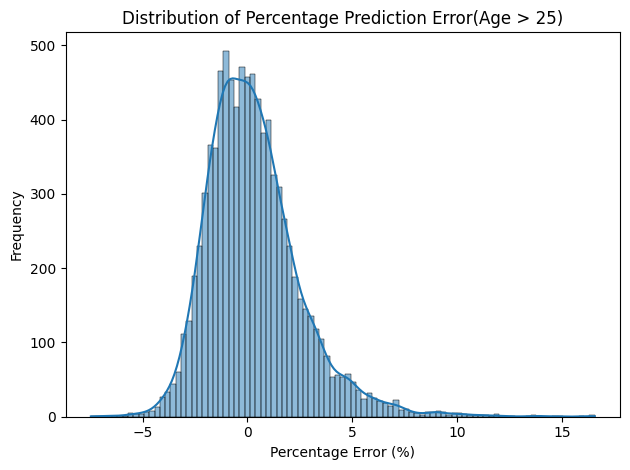

In [68]:
sns.histplot(results_df['diff_pct'], kde=True)

plt.title('Distribution of Percentage Prediction Error(Age > 25)')
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("github repository/rest/percentage_error_distribution_rest.png")
plt.show()

In [69]:
extreme_error_threshold = 10  # Assumption that the threshold for error is 10% as per discussion with business team
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
14286,6845,7621.263672,776.263672,11.340594
27518,8502,9425.934570,923.934570,10.867261
9285,6872,7621.263672,749.263672,10.903138
7547,6538,7621.263672,1083.263672,16.568732
21910,6651,7621.263672,970.263672,14.588237


In [70]:
extreme_results_df.shape

(29, 4)

In [71]:
extreme_results_df.shape[0]*100/x_test.shape[0]

0.32413099362914943

This indicates that only about 0.3% of the test data for customers aged above 25 exhibit extreme prediction errors, suggesting that the model performs well and is suitable for consideration.

#### Export the Model

In [72]:
from joblib import dump

dump(best_model, "artifacts/premium_model_rest.joblib")
scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(scaler_with_cols, "artifacts/premium_scaler_rest.joblib")

['artifacts/premium_scaler_rest.joblib']